# Breast Cancer Prediction


## Importing libraries


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Loading the data

In [2]:
data = pd.read_csv('data.csv')

## Inspecting the dataset


In [3]:
# What can we expect from the dataset ? 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#What shape does the dataset have ? 
data.shape

(569, 33)

In [5]:
#What types of diagosnsis are there ?
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

This is going to be the feature that we wanna predict. Based on the data we wanna be able to tell if a tumor is **Malignant** or **benign**.

In [6]:
#Are there null values on the database?
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Since the **Unnamed** column has all values null , then we can remove it.


In [7]:
#Removing the Unnamed column
data = data.drop(columns=['Unnamed: 32'],axis=1)

## Let's analyse better the feature we are trying to predict

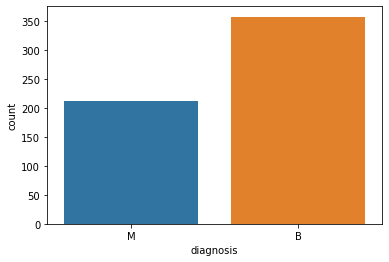

In [8]:
sns.countplot(data['diagnosis'],label='count')

We can see that there are more **Benign** cases than **Malignant**.

## Encoding the feature

### This process turns the **M**s into **1**s and the **B**s into **0**s so we can then feed the data to the model.
### Remove the comment on the 3rd line to see the output.

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
#lb_enc.fit_transform(data['diagnosis'].values)
data['diagnosis'] = lb_enc.fit_transform(data['diagnosis'].values)

## Visualizing the correlation matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


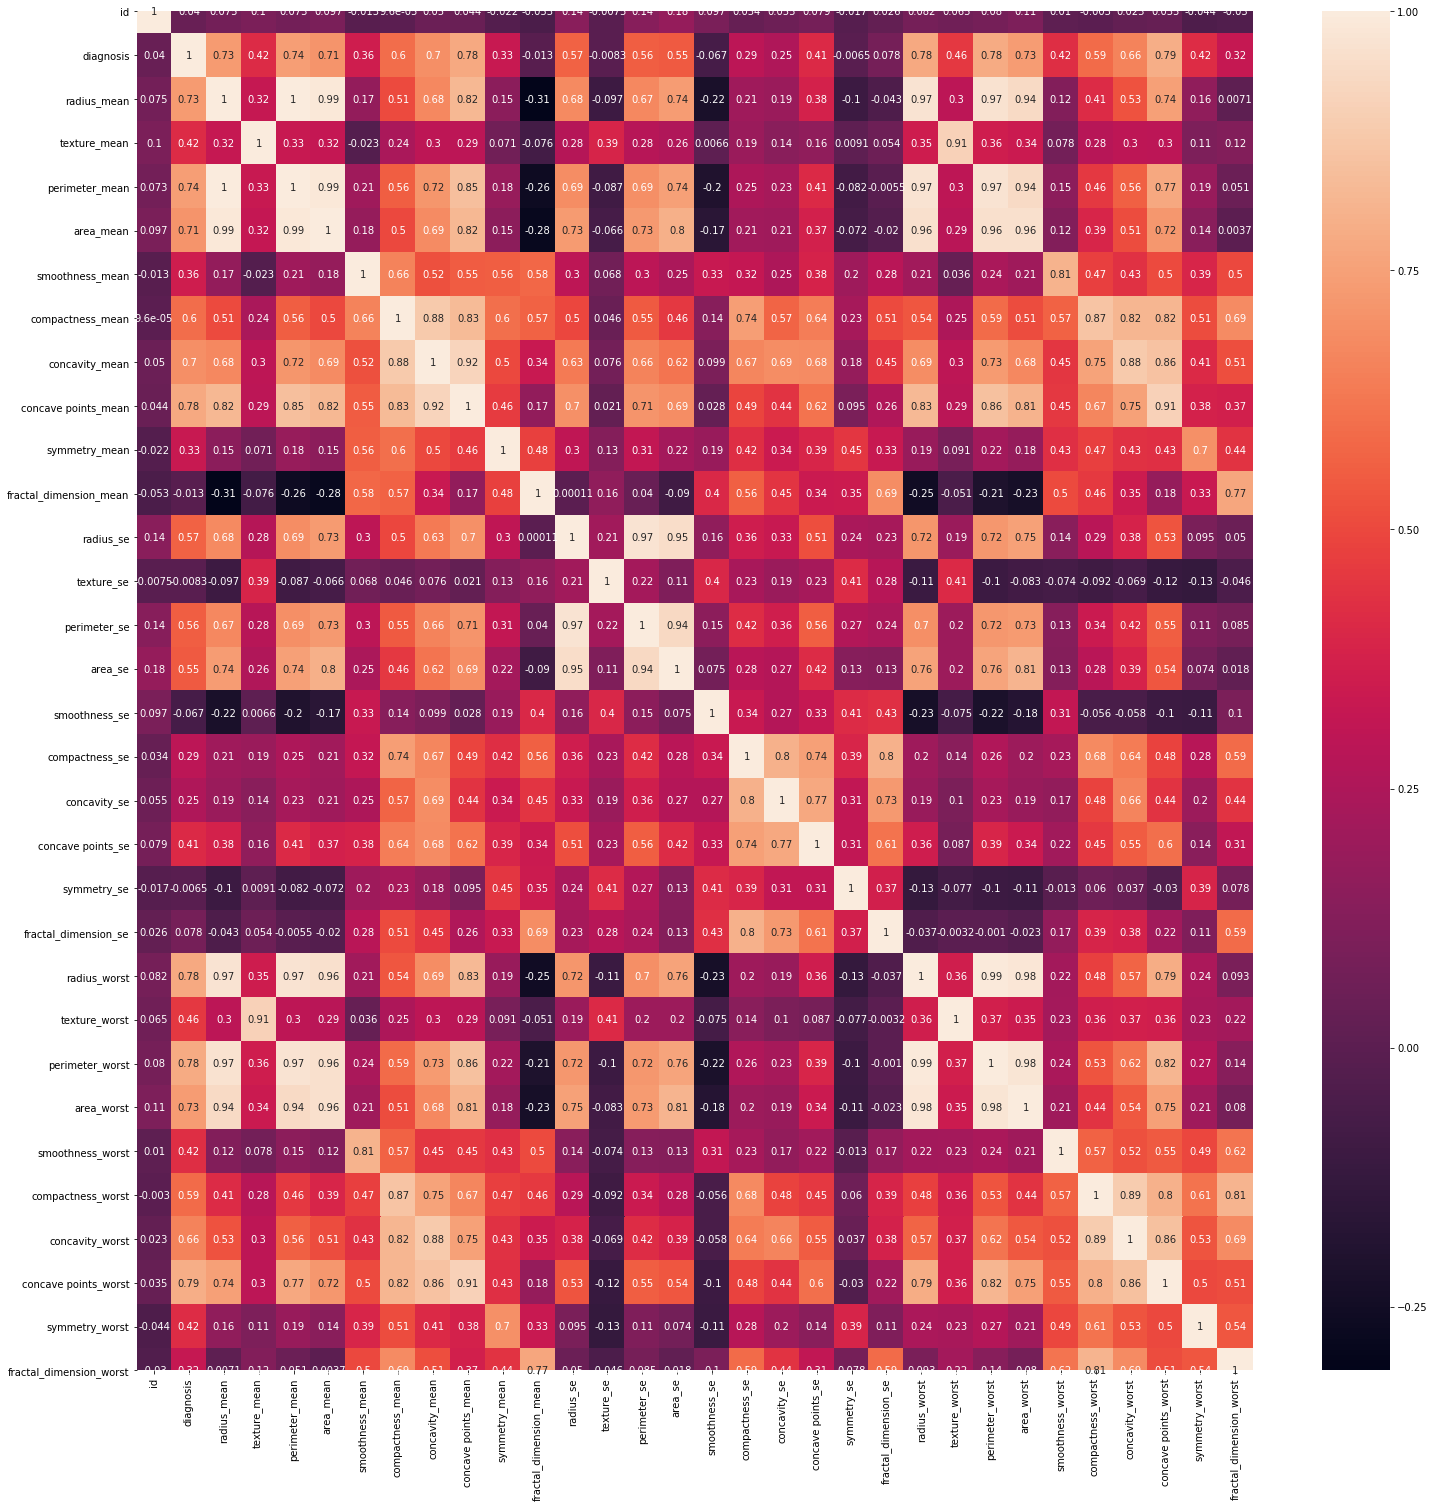

In [15]:
plt.figure(figsize=(25,25))
#Heatmap of correlatipn matrix
sns.heatmap(data.corr(),annot=True)
#Correlation matrix text format
data.corr()

## Getting the data ready for the models

In [26]:
#We drop the id column since it's not really relevant for this case
X = data.drop(['diagnosis','id'],axis=1)
Y = data['diagnosis']
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [29]:
#We split the data into training and testing sets
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

## Time to train our dataset into different models 

### Logistic Regression model


In [69]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,Y_train)
acc = lr_model.score(X_test,Y_test)
print("{}% accuracy ".format(acc * 100))

95.6140350877193% accuracy 


c:\users\nosco\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree Model

In [73]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
tree_model.fit(X_train,Y_train)
acc = tree_model.score(X_test,Y_test)
print("{}% accuracy ".format(acc * 100))

92.98245614035088% accuracy 


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
rf_model.fit(X_train,Y_train)
acc = rf_model.score(X_test,Y_test)
print("{}% accuracy ".format(acc * 100))

97.36842105263158% accuracy 


## Confusion Matrix


In [75]:
from sklearn.metrics import confusion_matrix
# Linear Model accuracu
tn, fp, fn, tp = confusion_matrix(Y_test, lr_model.predict(X_test)).ravel()
accuraccy = (tp + tn)  / (tp + tn + fp + fn)
print(accuraccy)


# Tree Accuracy
tn, fp, fn, tp = confusion_matrix(Y_test, tree_model.predict(X_test)).ravel()
accuraccy = (tp + tn)  / (tp + tn + fp + fn)
print(accuraccy)


# Random Forest Accuracy
tn, fp, fn, tp = confusion_matrix(Y_test, rf_model.predict(X_test)).ravel()
accuraccy = (tp + tn)  / (tp + tn + fp + fn)
print(accuraccy)


0.956140350877193
0.9298245614035088
0.9736842105263158
